In [2]:
import nltk

In [3]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [4]:
reviews =pd.read_csv("K8 Reviews v0.2.csv")
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [5]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [6]:
reviews.shape

(14675, 2)

In [7]:
from wordcloud import WordCloud

In [8]:
reviews_combined=" ".join(reviews.review.values)

In [9]:
len(reviews_combined)

1674772

In [10]:
word_cloud=WordCloud().generate_from_text(reviews_combined)

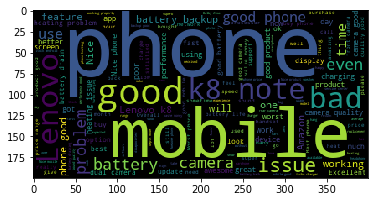

In [11]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [12]:
word_cloud=WordCloud(width=800,height=800,background_color='white',max_words=150).generate_from_text(reviews_combined)

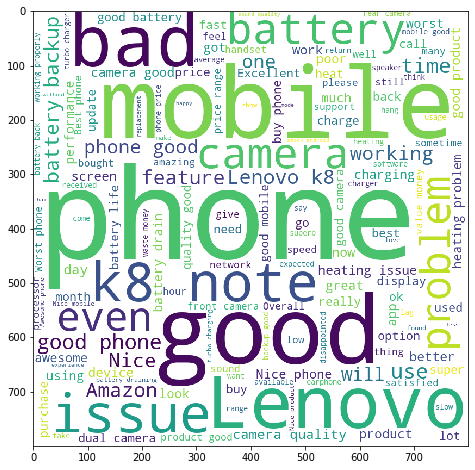

In [13]:

plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [14]:
import seaborn as sb

In [15]:
all_terms=[]
fdist={}
all_terms=reviews_combined.split(" ")
for word in all_terms:
    fdist[word]=fdist.get(word,0) +1

In [16]:
freq={"words":list(fdist.keys()),'freq':list(fdist.values())}
df_dist=pd.DataFrame(freq)

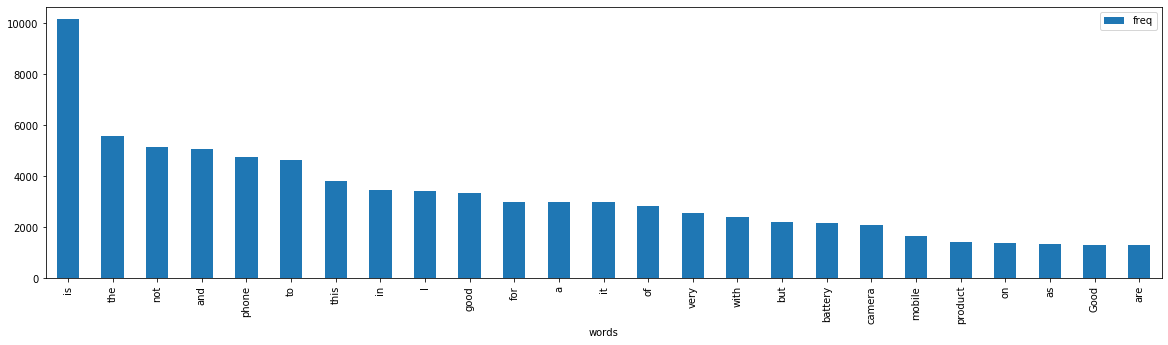

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
df_dist.sort_values(ascending=False,by="freq").head(25).plot.bar(x="words",y="freq",figsize=(20,5))

In [18]:
#1. case normalization and tokenization
r=reviews_combined.lower()

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
word_token=word_tokenize(r)

In [21]:
from string import punctuation

In [22]:
from nltk.corpus import stopwords

In [23]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [24]:
stop_nltk=stopwords.words("english")
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
punct_stop=list(punctuation) + stop_nltk +["..."]+["phone","mobile"]

In [26]:
review_tokens=[word for word in word_tokenize(r) if word not in punct_stop]

In [27]:
# below code removes 
#1.stopwords
#2.punct's
#3.custom stop words
#4.words with length less than 2

In [28]:
reviewed_updated1=[word for word in all_terms if word not in punct_stop and len(word)>2]

In [29]:
len(all_terms)

290293

In [30]:
reviewed_updated1[:50]

['Good',
 'need',
 'updates',
 'improvements',
 'Worst',
 'bought',
 'ever,',
 'Battery',
 'draining',
 'like',
 'hell,',
 'backup',
 'hours',
 'internet',
 'uses,',
 'even',
 'put',
 'idle',
 'getting',
 'discharged.This',
 'biggest',
 'lie',
 'Amazon',
 'Lenove',
 'expected,',
 'making',
 'full',
 'saying',
 'battery',
 '4000MAH',
 'booster',
 'charger',
 'fake,',
 'takes',
 'least',
 'hours',
 'fully',
 "charged.Don't",
 'know',
 'Lenovo',
 'survive',
 'making',
 'full',
 'us.Please',
 'don;t',
 'else',
 'regret',
 'like',
 'me.',
 'get']

In [31]:
from nltk.stem import SnowballStemmer

In [32]:
stemmer=SnowballStemmer("english")

In [33]:
words_s=[stemmer.stem(review) for review in review_tokens]

In [34]:
word_s=set(words_s)

In [35]:
len(word_s)

16670

In [36]:
from nltk.stem import WordNetLemmatizer

In [37]:


lemm=WordNetLemmatizer()

In [38]:
words_l=[lemm.lemmatize(word) for word in review_tokens]

In [39]:
len(set(words_l))

18392

In [40]:
#udf
def clean_txt(sent):
    all_terms=word_tokenize(sent.lower())
    stop_nltk=stopwords.words('english')
    pun_stop=list(punctuation)+stop_nltk+["..."]+["phone","mobile"]
    reviews_updated1=[i for i in all_terms if i not in pun_stop and len(i)>2]
    s=[stemmer.stem(i) for i in reviews_updated1]
    res=" ".join(s)
    return res


In [41]:
reviews["clean"]=reviews.review.apply(clean_txt)

In [42]:
reviews

,sentiment,review,clean
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...
5,0,Only I'm telling don't buyI'm totally disappoi...,tell n't buyi total disappointedpoor batterypo...
6,1,"Phone is awesome. But while charging, it heats...",awesom charg heat allot..r genuin reason hate ...
7,0,The battery level has worn down,batteri level worn
8,0,It's over hitting problems...and phone hanging...,hit problem hang problem lenovo note servic st...
9,0,A lot of glitches dont buy this thing better g...,lot glitch dont buy thing better option


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
count_vec=CountVectorizer()
x=count_vec.fit_transform(reviews["clean"])

In [45]:
count_vec=CountVectorizer(ngram_range=(2,2),max_features = 15)
x=count_vec.fit_transform(reviews["clean"])
count_vec.get_feature_names()

['batteri backup',
 'batteri drain',
 'batteri life',
 'camera good',
 'camera qualiti',
 'drain fast',
 'dual camera',
 'get heat',
 'good batteri',
 'good camera',
 'good product',
 'heat issu',
 'heat problem',
 'lenovo note',
 'work proper']

In [46]:
DTM=pd.DataFrame(x.toarray(),columns=count_vec.get_feature_names())
DTM.head()

,batteri backup,batteri drain,batteri life,camera good,camera qualiti,drain fast,dual camera,get heat,good batteri,good camera,good product,heat issu,heat problem,lenovo note,work proper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
DTM['batteri drain'].value_counts()

0    14204
1      452
2       19
Name: batteri drain, dtype: int64

In [48]:
DTM['good camera'].value_counts()

0    14429
1      244
2        2
Name: good camera, dtype: int64

In [49]:
DTM[DTM['batteri drain']==2]

,batteri backup,batteri drain,batteri life,camera good,camera qualiti,drain fast,dual camera,get heat,good batteri,good camera,good product,heat issu,heat problem,lenovo note,work proper
397,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
659,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1017,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
2047,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4552,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
5765,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
6773,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
6978,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8231,0,2,0,0,1,1,0,0,0,1,0,0,0,0,0
8875,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0


In [50]:
b=[]
c=[]
for i in reviews:
    a=clean_txt(i)
    b.append(a)
    c=" ".join(b)

In [51]:
c

'sentiment review clean'

count_vec=CountVectorizer(ngram_range=(2,2))
x=count_vec.fit_transform(data["text"])
count_vec.get_feature_names()

In [52]:
dtm_bigram=pd.DataFrame(x.toarray(),columns=count_vec.get_feature_names())

In [53]:
terms=[]
fdist1={}
all_terms=a.split(" ")
for word in all_terms:
    fdist1[word]=fdist1.get(word,0) +1

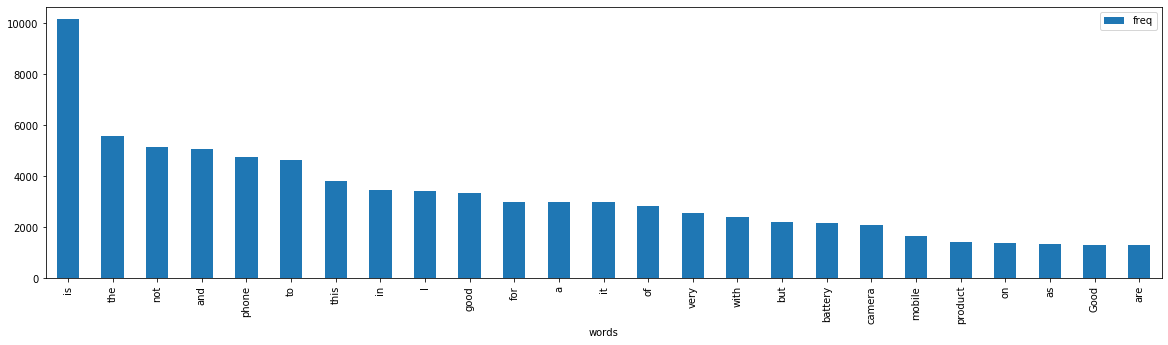

In [54]:
df_dist.sort_values(ascending=False,by="freq").head(25).plot.bar(x="words",y="freq",figsize=(20,5))

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tf_idf_vec=TfidfVectorizer(ngram_range=(2,2), max_features=10)
score=tf_idf_vec.fit_transform(reviews["clean"])
dt_tfidf=pd.DataFrame(score.toarray(),columns=tf_idf_vec.get_feature_names())
dt_tfidf.head()

,batteri backup,batteri drain,camera good,camera qualiti,dual camera,good batteri,good product,heat issu,heat problem,lenovo note
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
dt_tfidf['batteri drain'].value_counts()

0.000000    14204
1.000000      313
0.692067       34
0.668366       17
0.706938       16
0.681241       15
0.665977       12
0.712829       10
0.722010        5
0.689637        5
0.687559        5
0.546040        4
0.496485        3
0.453047        3
0.546968        2
0.901827        2
0.570448        2
0.412638        2
0.544735        2
0.572047        2
0.574142        2
0.569493        2
0.894342        1
0.802793        1
0.558737        1
0.547079        1
0.289332        1
0.443264        1
0.801754        1
0.552993        1
0.557046        1
0.585282        1
0.548290        1
0.568988        1
0.561395        1
Name: batteri drain, dtype: int64

In [58]:
bat_dr=dt_tfidf[dt_tfidf['batteri drain']==1]
bat_dr.head()

,batteri backup,batteri drain,camera good,camera qualiti,dual camera,good batteri,good product,heat issu,heat problem,lenovo note
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
merge=pd.merge(reviews,bat_dr,left_on=reviews.index,right_on=bat_dr.index)
merge

,key_0,sentiment,review,clean,batteri backup,batteri drain,camera good,camera qualiti,dual camera,good batteri,good product,heat issu,heat problem,lenovo note
0,1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18,0,Battery draining very rapidly I don't know why...,batteri drain rapid n't know why..tel possibl ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,81,0,Hello all.. Before you purchase remember Batte...,hello all.. purchas rememb batteri perform dev...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,112,0,It's battery is draining very fast.,batteri drain fast,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,120,0,Phn is gud n nice.but the battery is draining ...,phn gud nice.but batteri drain fast.batteri 40...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,174,0,"Battery drains too fast , even when kept idle ...",batteri drain fast even kept idl .pleas buy le...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,212,0,"Too much heating , battery drains up very very...",much heat batteri drain quick issu mic time ca...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,326,0,"My goodness..nvr thought abt it, mobile auto r...",goodness..nvr thought abt auto restart issu ne...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,349,0,Over heating when we use VOLTE and battery dra...,heat use volt batteri drain fast otherwis,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,397,0,Battery drains very fast when im using continu...,batteri drain fast use continu batteri drain 1...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sentimental prediction strategy 1:word based 

In [60]:
data=pd.read_csv("AFINN-111.txt",sep="\t",header=None)

In [61]:
data.columns=["terms","scores"]
term_scores=dict(data.values)

In [62]:
def get_sentiment(sent):
    tokens=word_tokenize(sent.lower())
    score=0
    for term in tokens:
        score+=term_scores.get(term,0)
    return score

In [63]:
b=[]
for i in reviews["clean"]:
    a=get_sentiment(i)
    b.append(a)
reviews["sent_score"]=b

In [64]:
#reviews['sent_score']=reviews.clean.apply(get_sentiment)

In [92]:
reviews

,sentiment,review,clean,sent_score,pred_score,score_vader,sent_pred_vader
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,1,0.0000,0
3,1,Good,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,-0.8289,0
5,0,Only I'm telling don't buyI'm totally disappoi...,tell n't buyi total disappointedpoor batterypo...,0,1,0.0000,0
6,1,"Phone is awesome. But while charging, it heats...",awesom charg heat allot..r genuin reason hate ...,-3,0,0.1027,0
7,0,The battery level has worn down,batteri level worn,-1,0,-0.2960,0
8,0,It's over hitting problems...and phone hanging...,hit problem hang problem lenovo note servic st...,-4,0,-0.4019,0
9,0,A lot of glitches dont buy this thing better g...,lot glitch dont buy thing better option,2,1,0.4404,1


In [66]:
pred=[]
for i in reviews['sent_score']:
    if (i>=0):
      pred.append(1)
    else:
        pred.append(0)
reviews["pred_score"]=pred

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [68]:
cm=confusion_matrix(reviews['sentiment'],reviews['pred_score'])
ac=accuracy_score(reviews['sentiment'],reviews['pred_score'])

In [69]:
cm

array([[2751, 4961],
       [ 213, 6750]], dtype=int64)

In [70]:
ac

0.647427597955707

In [71]:
import nltk

In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [73]:
analyzer=SentimentIntensityAnalyzer()

In [74]:
analyzer.polarity_scores("this food is good!")

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}

In [75]:
analyzer.polarity_scores("this food is terrible")

{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

In [76]:
analyzer.polarity_scores("this food is good!!!")

{'neg': 0.0, 'neu': 0.443, 'pos': 0.557, 'compound': 0.5826}

In [77]:
analyzer.polarity_scores("this food is GOOD")

{'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.5622}

In [78]:
analyzer.polarity_scores("this food is good?")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [79]:
analyzer.polarity_scores("just heard the news :)")

{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588}

In [80]:
analyzer.polarity_scores("just heard the news :(")

{'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compound': -0.4404}

In [81]:
analyzer.polarity_scores("just heard the news :@")['compound']

-0.5423

In [82]:
analyzer.polarity_scores("Just heard the NEWS smh")

{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'compound': -0.3182}

In [83]:
def get_vader_sentiment(sent):
    return analyzer.polarity_scores(sent)['compound']
    

In [84]:
reviews['score_vader']=reviews.review.apply(get_vader_sentiment)

In [90]:
#reviews['score_vader'].value_counts()

In [91]:
reviews['sent_pred_vader']=reviews.score_vader.apply(lambda x:1 if x>0.3 else 0)

In [94]:
cm=confusion_matrix(reviews['sentiment'],reviews['sent_pred_vader'])
ac=accuracy_score(reviews['sentiment'],reviews['sent_pred_vader'])

In [95]:
cm

array([[6301, 1411],
       [1538, 5425]], dtype=int64)

In [96]:
ac

0.7990459965928449

In [98]:
x=reviews.clean.values
y=reviews.sentiment.values

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [102]:
vect=CountVectorizer(max_features=2500)

In [110]:
x_train

array(['better redmi', 'nice',
       'good display upon unlock screen respond sometim contact save save name get lost time see doubt batt 4000 mah buy consid',
       ..., 'batteri start drain fast month time',
       'regular heat temperatur continu heat.video song clear play.batteri back poor continu heat time open data charg',
       ''], dtype=object)

In [121]:
x_test

array(['bad product',
       'yeh bahut jaldi garam raha batteri back jyada nahi hai redmi apeksha',
       'unsatisfi lenovo note 64. batteri consumpt high drain less hrs continu work turbo charg right said minut take one half hour get charg rear camera bad night screen resolut pale',
       ..., "n't buy buy product troubl bodi temperatur even winter also",
       'real good perform product anticip lenovo pleas disappoint user friend differ even delet call histori edit profil',
       'bahut madarchod hand set hai yeh'], dtype=object)

In [104]:
#extract the features and transform -get the count of no of term in every document
x_train_bow=vect.fit_transform(x_train)

In [105]:
x_test_bow=vect.transform(x_test)

In [122]:
x_test_bow

<4403x2500 sparse matrix of type '<class 'numpy.int64'>'
	with 40813 stored elements in Compressed Sparse Row format>

In [106]:
x_train_bow.shape,x_test_bow.shape

((10272, 2500), (4403, 2500))

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
lr=LogisticRegression()

In [111]:
mod=lr.fit(x_train_bow,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
y_pred=lr.predict(x_test_bow)

In [113]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)

In [116]:
ac

0.8496479672950261

In [117]:
cm

array([[1926,  385],
       [ 277, 1815]], dtype=int64)

In [118]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2311
           1       0.82      0.87      0.85      2092

    accuracy                           0.85      4403
   macro avg       0.85      0.85      0.85      4403
weighted avg       0.85      0.85      0.85      4403

